In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
sorted(os.listdir('f1_race_data'))

['.ipynb_checkpoints',
 'circuits.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'constructors.csv',
 'driver_standings.csv',
 'drivers.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [3]:
circuits = pd.read_csv('f1_race_data/circuits.csv')
constructor_results = pd.read_csv('f1_race_data/constructor_results.csv')
constuctor_standings = pd.read_csv('f1_race_data/constructor_standings.csv')
constructors = pd.read_csv('f1_race_data/constructors.csv')
driver_standings = pd.read_csv('f1_race_data/driver_standings.csv')
drivers = pd.read_csv('f1_race_data/drivers.csv')
lap_times = pd.read_csv('f1_race_data/lap_times.csv')
pit_stops = pd.read_csv('f1_race_data/pit_stops.csv')
qualifying = pd.read_csv('f1_race_data/qualifying.csv')
races = pd.read_csv('f1_race_data/races.csv')
driver_standings = pd.read_csv('f1_race_data/driver_standings.csv')
results = pd.read_csv('f1_race_data/results.csv')
seasons = pd.read_csv('f1_race_data/seasons.csv')
sprint_results = pd.read_csv('f1_race_data/sprint_results.csv')
status = pd.read_csv('f1_race_data/status.csv')


In [4]:
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']
results_df = results.merge(drivers[['driverId', 'full_name']], on='driverId', how='inner').drop('driverId', axis=1).merge(
                constructors[['constructorId', 'name']], how='inner', on='constructorId').drop('constructorId', axis=1)\
                .rename({'full_name':'driver', 'name':'constructor'}, axis=1).merge(races[['year', 'name', 'raceId','date']], how='inner', on='raceId')\
                .rename({'name':'race'}, axis=1)
results_df = results_df.replace({'\\N': np.nan})
results_df['date'] = pd.to_datetime(results_df['date'])
results_df[(results_df['driver'] == 'Robert Kubica') & (pd.to_numeric(results_df['position']) <= 3)].sort_values('date', ascending=True)
# results_df[(results_df['driver'] == 'Robert Kubica') & (pd.to_numeric(results_df['year']) == 2008)].sort_values('date', ascending=True)

,resultId,raceId,number,grid,position,positionText,positionOrder,points,laps,time,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver,constructor,year,race,date
4385,1053,67,17,6,3,3,3,6.0,53,+26.414,...,21,4,1:23.111,250.927,1,Robert Kubica,BMW Sauber,2006,Italian Grand Prix,2006-09-10
25,24,19,4,4,2,2,2,8.0,56,+19.570,...,39,6,1:35.921,208.033,1,Robert Kubica,BMW Sauber,2008,Malaysian Grand Prix,2008-03-23
47,47,20,4,1,3,3,3,6.0,57,+4.998,...,55,5,1:33.775,207.765,1,Robert Kubica,BMW Sauber,2008,Bahrain Grand Prix,2008-04-06
111,110,23,4,5,2,2,2,8.0,76,+3.064,...,75,5,1:17.933,154.286,1,Robert Kubica,BMW Sauber,2008,Monaco Grand Prix,2008-05-25
131,129,24,4,2,1,1,1,10.0,70,1:36:24.227,...,47,4,1:17.539,202.473,1,Robert Kubica,BMW Sauber,2008,Canadian Grand Prix,2008-06-08
231,231,29,4,3,3,3,3,6.0,57,+37.353,...,38,4,1:39.330,196.399,1,Robert Kubica,BMW Sauber,2008,European Grand Prix,2008-08-24
271,271,31,4,11,3,3,3,6.0,53,+20.471,...,52,12,1:30.298,230.955,1,Robert Kubica,BMW Sauber,2008,Italian Grand Prix,2008-09-14
311,310,33,4,6,2,2,2,8.0,67,+5.283,...,16,7,1:19.292,207.168,1,Robert Kubica,BMW Sauber,2008,Japanese Grand Prix,2008-10-12
1045,7855,16,5,8,2,2,2,8.0,71,+7.626,...,38,4,1:14.155,209.188,1,Robert Kubica,BMW Sauber,2009,Brazilian Grand Prix,2009-10-18
1114,20348,338,11,9,2,2,2,18.0,58,+12.034,...,52,8,1:29.570,213.138,1,Robert Kubica,Renault,2010,Australian Grand Prix,2010-03-28


In [63]:
races[races['year'] == 2011]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
840,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
841,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
843,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
844,846,2011,6,6,Monaco Grand Prix,2011-05-29,12:00:00,http://en.wikipedia.org/wiki/2011_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
845,847,2011,7,7,Canadian Grand Prix,2011-06-12,17:00:00,http://en.wikipedia.org/wiki/2011_Canadian_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
846,848,2011,8,12,European Grand Prix,2011-06-26,12:00:00,http://en.wikipedia.org/wiki/2011_European_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
847,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
848,850,2011,10,20,German Grand Prix,2011-07-24,12:00:00,http://en.wikipedia.org/wiki/2011_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


'2015 Hungarian Grand Prix'

In [64]:
selected_race_id = 847
race_name = f"{races[races['raceId']==selected_race_id]['year'].values[0]} {races[races['raceId']==selected_race_id]['name'].values[0]}"
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']
lap_times_df = lap_times.merge(drivers[['driverId', 'full_name']], on='driverId', how='inner').drop('driverId', axis=1).rename({'full_name': 'driver'}, axis=1)
lap_times_df = lap_times_df[lap_times_df['raceId'] == selected_race_id].sort_values(['driver', 'lap']).reset_index()
# df['Sum_Cummulative']=df.groupby(df['Name'].eq('AAAA').cumsum())['Number'].cumsum()
lap_times_df['relative_time'] = (lap_times_df.merge(lap_times_df.groupby(lap_times_df["lap"]).mean()['milliseconds'], on='lap').sort_values(['driver', 'lap']).reset_index()['milliseconds_y'] -\
lap_times_df.merge(lap_times_df.groupby(lap_times_df["lap"]).mean()['milliseconds'], on='lap').sort_values(['driver', 'lap']).reset_index()['milliseconds_x'])/1000
lap_times_df['total_time'] = lap_times_df.groupby(lap_times_df["driver"]).cumsum()['relative_time']
lap_times_df = lap_times_df.merge(results_df[results_df['raceId'] == selected_race_id][['driver', 'constructor']], on='driver', how='inner')
lap_times_df

,index,raceId,lap,position,time,milliseconds,driver,relative_time,total_time,constructor
0,118013,847,1,14,2:33.179,153179,Adrian Sutil,-1.153917,-1.153917,Force India
1,118014,847,2,14,2:04.975,124975,Adrian Sutil,0.298750,-0.855167,Force India
2,118015,847,3,14,2:04.547,124547,Adrian Sutil,0.333292,-0.521875,Force India
3,118016,847,4,14,2:00.994,120994,Adrian Sutil,0.431958,-0.089917,Force India
4,118017,847,5,13,1:41.378,101378,Adrian Sutil,-0.464625,-0.554542,Force India
...,...,...,...,...,...,...,...,...,...,...
1483,204847,847,65,14,1:24.179,84179,Vitantonio Liuzzi,-1.692167,-70.120674,HRT
1484,204848,847,66,14,1:24.713,84713,Vitantonio Liuzzi,-3.155111,-73.275785,HRT
1485,204849,847,67,14,1:25.202,85202,Vitantonio Liuzzi,-3.940556,-77.216341,HRT
1486,204850,847,68,13,1:26.845,86845,Vitantonio Liuzzi,-5.495412,-82.711753,HRT


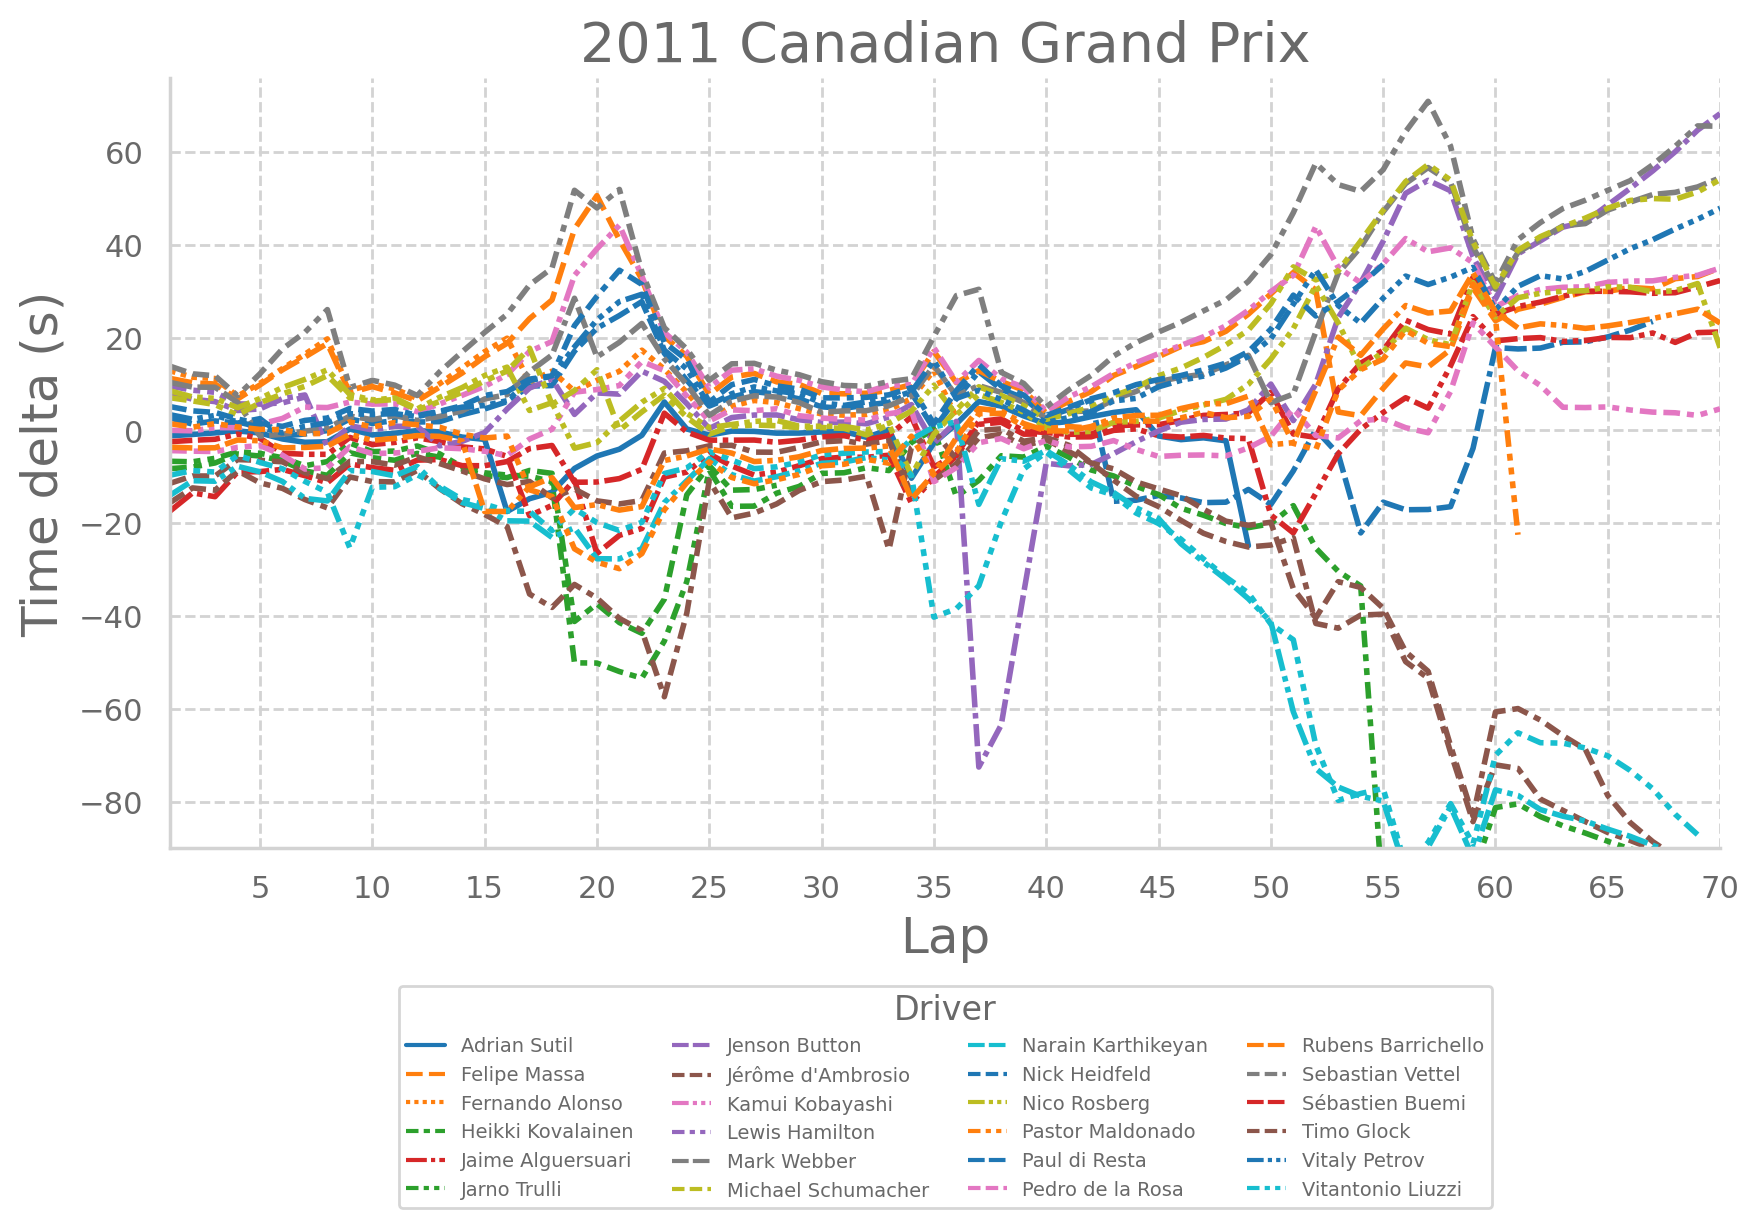

In [65]:
plt.figure(figsize=(10,5),dpi=200)
# sns.set(style="whitegrid")

sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'grid.color': 'lightgrey',
 'grid.linestyle': 'dashed',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

ax = sns.lineplot(data=lap_times_df, x='lap', y='total_time', hue='constructor', style='driver', palette='tab10', linewidth=2)
drivers_dict = dict(zip(lap_times_df.driver, lap_times_df.constructor))
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('driver')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

for handle, label in zip(handles[index_item_title + 1:], labels[index_item_title + 1:]):
    handle.set_color(color_dict[drivers_dict[ label]])

# create a legend only using the items


# plt.legend(bbox_to_anchor=(0.85, -0.15), ncol=4, prop={'size': 7})
# plt.yticks(range(1, len(lap_times_df['driver'].unique())+1))
plt.xticks(range(0, lap_times_df['lap'].max()+1, 5))
plt.title(race_name)
plt.ylabel('Time delta (s)')
plt.xlabel('Lap')
plt.xlim(1, lap_times_df['lap'].max())
plt.ylim(-90, lap_times_df['total_time'].max()+5)

ax.legend(handles[index_item_title + 1:], labels[index_item_title + 1:], title='Driver',
          bbox_to_anchor=(0.5, -0.48), ncol=4, prop={'size': 7}, loc='lower center')
# plt.tight_layout()
ax.set_axisbelow(True)
plt.savefig(f'exported_images/f1_races/{race_name}.png', bbox_inches='tight', dpi=150, transparent=False)

In [56]:
import matplotlib as mpl

mpl.rc_file_defaults()

In [88]:
polesitters = results_df[results_df['grid']==1]
winners = results_df[results_df['positionOrder']==1]
pole_and_winners_df = pd.concat([polesitters.groupby('year').mean()['positionOrder'], winners.groupby('year').mean()['grid']], axis=1)\
    .rename({'positionOrder': 'polesitter_position', 'grid': 'winner_grid'}, axis=1)
pole_and_winners_df.sort_values('winner_grid').tail(10)

,polesitter_position,winner_grid
year,,
1973,7.933333,3.800000
1967,8.636364,3.818182
1985,6.687500,4.000000
1968,9.416667,4.166667
1977,8.294118,4.176471
1961,7.625000,4.375000
1955,7.333333,4.428571
1975,9.357143,4.571429
1983,12.600000,4.933333
